# Example of usage of Sorbetto for the TSW project 10 

In [16]:
import numpy as np
import os
import json

## Load data

In [17]:
PATH_DATA = os.path.join(os.getcwd(), "data", "TSW_project10_data.json")

f = open(PATH_DATA)
entity_project10 = json.load(f)
f.close()

proba_tn = entity_project10["proba_tn"]
proba_fp = entity_project10["proba_fp"]
proba_fn = entity_project10["proba_fn"]
proba_tp = entity_project10["proba_tp"]

print(
    f"proba_tn: {proba_tn}, proba_fp: {proba_fp}, proba_fn: {proba_fn}, proba_tp: {proba_tp}"
)

proba_tn: 0.8625131538876198, proba_fp: 0.01855227290425162, proba_fn: 0.011438685189231869, proba_tp: 0.10749588801889663


## Get Value Tile 

In [18]:
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.tile.value_tile import ValueTile
from sorbetto.flavor.value_flavor import ValueFlavor

project10_value_tile = ValueTile(
    name="Value Tile for Project 10",
    parameterization=ParameterizationDefault(),
    flavor=ValueFlavor(
        performance=TwoClassClassificationPerformance(
            ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
        )
    ),
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Value Tile for Project 10'}, xlabel='a(I)', ylabel='b(I)'>)

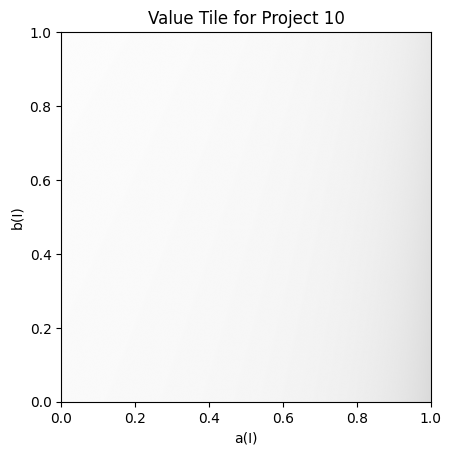

In [ ]:
project10_value_tile.draw()

# TODO: Add annotations with scores for IoU, accuracy, precision, recall
# TODO: Add colorbar
# TODO: Compute prefered scores

In [20]:
project10_value_tile.getExplanation()

'Explanation for this tile is not implemented yet'